In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
loaded_model = tf.keras.models.load_model('pose_classification_model_new_MobileNetV2.h5')

# Set up the test dataset
TEST_DIR = r"C:/Users/Lenovo/Desktop/koi bhi/test/"
IMG_WIDTH, IMG_HEIGHT = 224, 224  # Adjust according to your model's input size
BATCH_SIZE = 32  # Adjust the batch size as per your requirements

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Evaluate the model on the test dataset
test_steps_per_epoch = len(test_generator)
test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 1030 images belonging to 4 classes.
33/33 [==============================] - 24s 669ms/step - loss: 0.1933 - accuracy: 0.9165
Test Loss: 0.19326959550380707
Test Accuracy: 0.9165048599243164


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels from the test dataset
y_true = test_generator.classes
y_pred = loaded_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


33/33 [==============================] - 24s 672ms/step
Confusion Matrix:
[[210 121  24 101]
 [132  89  17  46]
 [ 32  14   2  11]
 [108  70  16  37]]


In [5]:
# Compute the classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)


Classification Report:
                   precision    recall  f1-score   support

          correct       0.44      0.46      0.45       456
        incorrect       0.30      0.31      0.31       284
             none       0.03      0.03      0.03        59
partially correct       0.19      0.16      0.17       231

         accuracy                           0.33      1030
        macro avg       0.24      0.24      0.24      1030
     weighted avg       0.32      0.33      0.32      1030



33/33 [==============================] - 23s 677ms/step


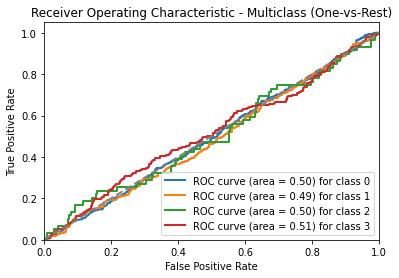

In [8]:
from sklearn.metrics import roc_curve, auc
NUM_CLASSES = 4

# Assuming multiclass classification with 'n_classes' classes
n_classes = NUM_CLASSES  # Replace 'NUM_CLASSES' with the number of classes in your problem

# Get predicted probabilities for each class
y_pred_prob = loaded_model.predict(test_generator)

# For each class, compute ROC curve and AUC
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_generator.classes == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc, i))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


In [9]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred)

# Print metrics for each class
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-score: {f1_score[i]}")
    print("=" * 30)


Class: correct
Precision: 0.43568464730290457
Recall: 0.4605263157894737
F1-score: 0.44776119402985076
Class: incorrect
Precision: 0.30272108843537415
Recall: 0.31338028169014087
F1-score: 0.3079584775086506
Class: none
Precision: 0.03389830508474576
Recall: 0.03389830508474576
F1-score: 0.03389830508474576
Class: partially correct
Precision: 0.18974358974358974
Recall: 0.16017316017316016
F1-score: 0.1737089201877934


In [11]:
from sklearn.metrics import average_precision_score

# Compute average precision for each class
average_precision = average_precision_score(y_true, y_pred_prob)

print("Mean Average Precision (mAP):", average_precision)


Mean Average Precision (mAP): 0.25233861021145654


Found 1030 images belonging to 4 classes.
33/33 [==============================] - 192s 6s/step
Normalized confusion matrix


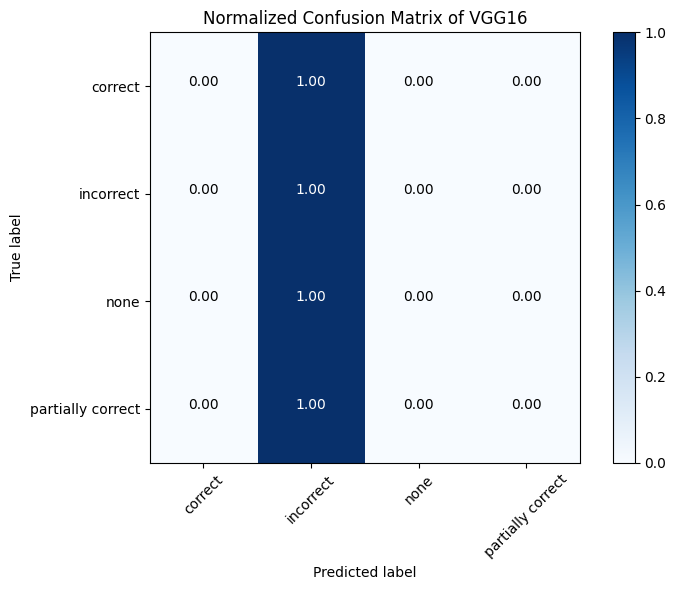

In [15]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained model
model = load_model(r"d:\Capstone\koi bhi\Top_5_Models\pose_classification_model_vgg16.h5")  # Replace with the path to your trained model

# Define the test data directory
test_data_dir = r"d:\Capstone\koi bhi\test"

# Define image data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You may need to adjust preprocessing as per your model's requirements

# Load test data from the test folder with subfolders
batch_size = 32
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Adjust the target size according to your model
    batch_size=batch_size,
    class_mode='categorical',  # You can change this depending on your model's output
    shuffle=False  # Important: Set shuffle to False to get ordered predictions
)

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Get true labels from the test data generator
true_labels = test_generator.classes

# Define class labels based on subfolder names
class_names = sorted(os.listdir(test_data_dir))

# Calculate the confusion matrix
confusion_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)
for i in range(len(predictions)):
    true_class = true_labels[i]
    predicted_class = np.argmax(predictions[i])
    confusion_matrix[true_class][predicted_class] += 1

# Function to plot confusion matrix
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True, title='Normalized Confusion Matrix of VGG16')
plt.savefig(r"c:\Users\Lenovo\Desktop\confusion_matrix_VGG16.png", format="png", dpi=300)

# Show the plot
plt.show()



Comparing Confusion Matrix